### Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04
0,Casos nuevos con sintomas,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,3618,3956,4128,3355,3736,4437,5082,3206.0,4537.0,4172.0
1,Casos totales,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,77961,82289,86943,90638,94858,99688,105159,108686.0,113628.0,118292.0
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30915,33540,36115,38598,40431,42727,44946,NaN,NaN,NaN
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806,841,890,944,997,1054,1113,1188.0,1275.0,1356.0
4,Casos activos,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,46240,47908,49938,51096,53430,55907,59100,21325.0,21605.0,21305.0
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,346,372,526,340,484,393,389,321.0,405.0,492.0
6,Casos nuevos totales,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,3964,4328,4654,3695,4220,4830,5471,3527.0,4942.0,4664.0


In [3]:
def dia_cambio_metodologia(X,Y):
    plt.text(X, Y, 'Cambio de metodologia')

In [4]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
def Graph(name_item):
    data_by_item = data[(data.Item == name_item)].values
    Y            = np.delete(data_by_item, 0)
    X            = data.columns[1:]
    plt.figure(figsize=(20,10))
    plt.plot(X, Y, 'b')
    plt.plot(X, Y, 'bo')
    labelonbars([X[len(X)-1]], [Y[len(X)-1]])
    #dia_cambio_metodologia('2020-04-29',770)
    plt.xlabel('Fecha')
    plt.ylabel(name_item)
    plt.title(name_item)
    plt.grid()
    #plt.yscale('log')
    plt.xticks(X, rotation='vertical')
    plt.show()

## Casos totales

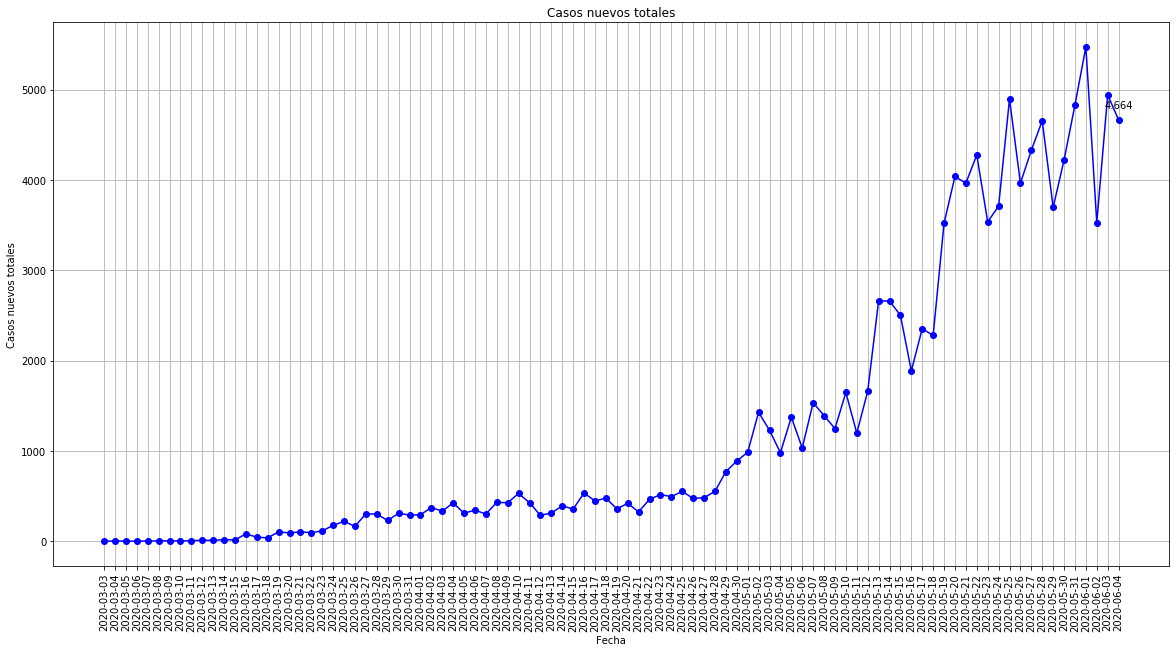

In [5]:
Graph("Casos nuevos totales")

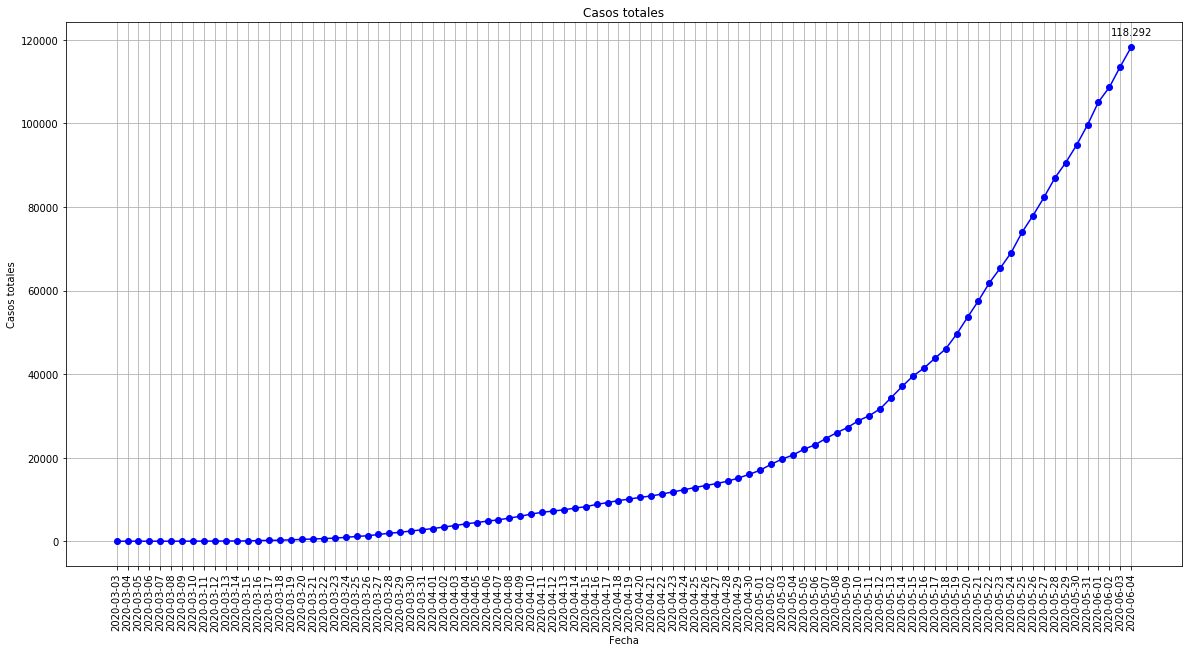

In [6]:
Graph("Casos totales")

In [21]:
#Graph("Casos recuperados")

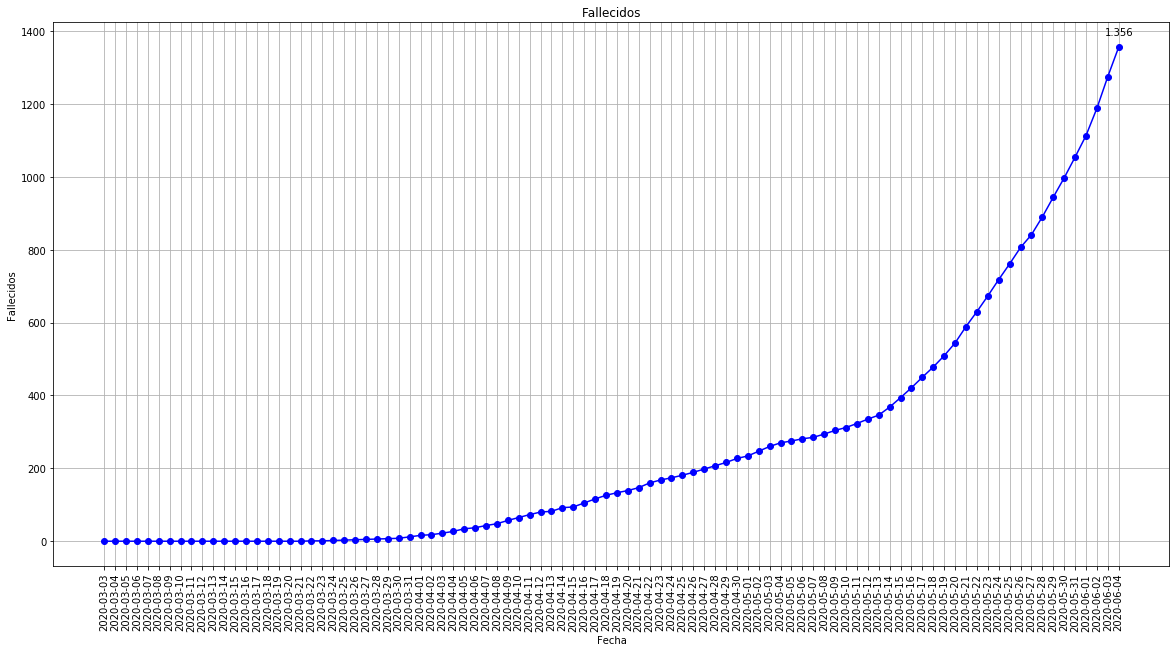

In [8]:
Graph("Fallecidos")

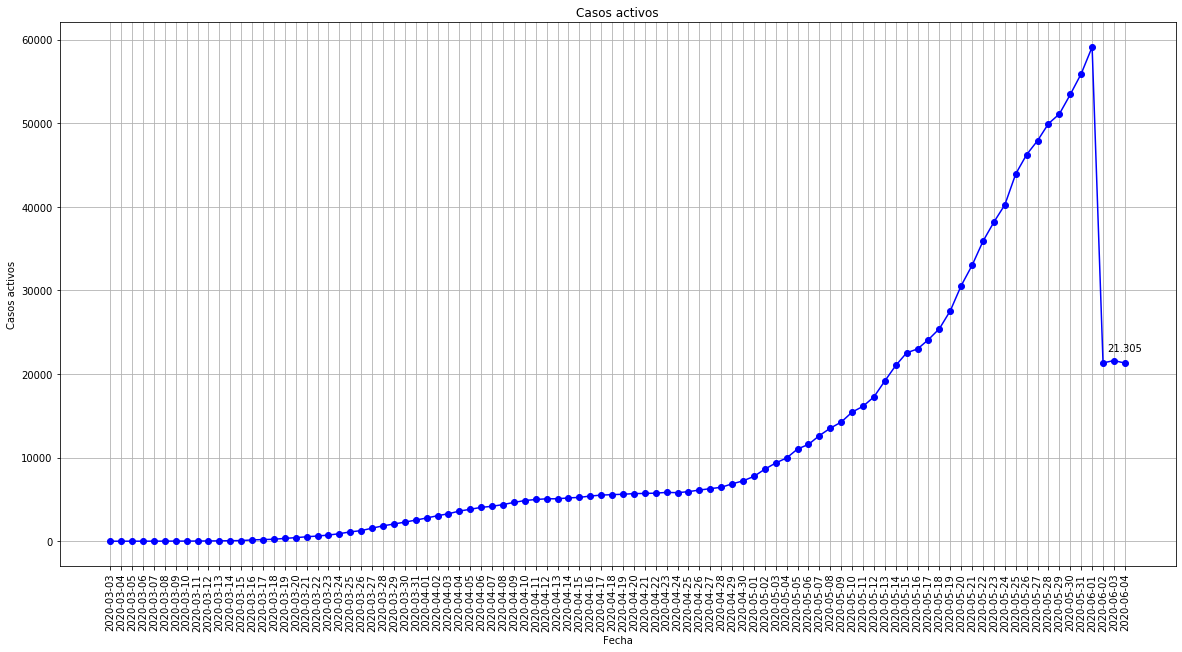

In [9]:
Graph("Casos activos")

## Regresión polinomica casos acumulados

In [10]:
fechas = data.columns[1:]
casos_totales = data[data["Item"]=="Casos totales"].values[0][1:]
dias          = [i for i in range (len(casos_totales))]
df = pd.DataFrame({
    'fecha': fechas,
    'dias': dias,
    'casos totales': casos_totales
})
df.tail(10)

,fecha,dias,casos totales
84,2020-05-26,84,77961
85,2020-05-27,85,82289
86,2020-05-28,86,86943
87,2020-05-29,87,90638
88,2020-05-30,88,94858
89,2020-05-31,89,99688
90,2020-06-01,90,105159
91,2020-06-02,91,108686
92,2020-06-03,92,113628
93,2020-06-04,93,118292


In [11]:
X = df[["dias"]]
Y = df[["casos totales"]]

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=9)
X_data = poly.fit_transform(X)

In [14]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lm.score(X_data, Y)

0.9998605861766621

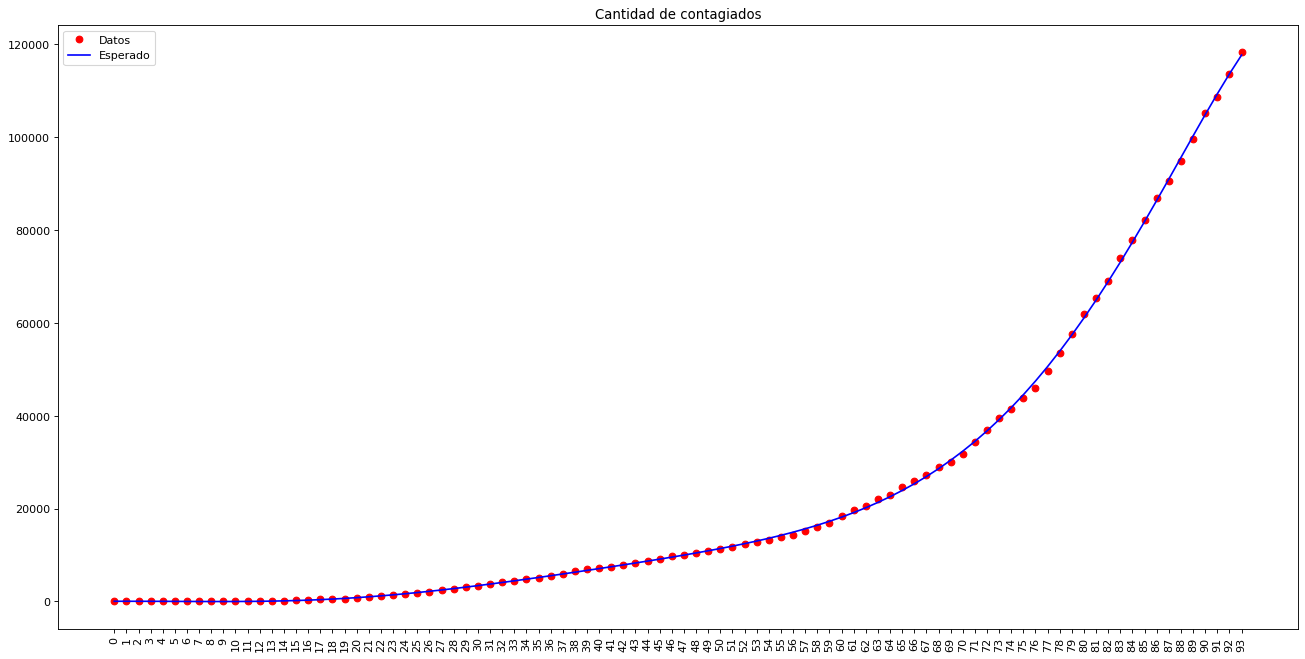

In [16]:
%matplotlib inline
Y_predict = lm.predict(X_data)
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, Y, "ro")
plt.plot(X, Y_predict, color="blue")
plt.xticks(X.values.tolist(), rotation='vertical')
plt.legend(["Datos", "Esperado"])
plt.title("Cantidad de contagiados")
plt.show()

## Media de los errores

In [17]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)

In [18]:
df["Casos totales predict"] = Y_predict
df["Casos totales predict"] = df["Casos totales predict"].astype(int)

In [19]:
mse = mean_squared_error(y_true = Y, y_pred = Y_predict)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
rmse

368.63094172706485

## Predicción

In [20]:
for i in range(len(df)-1, len(df)+2):
    prediccion   = int(lm.predict(poly.fit_transform([[i]])))
    prediccion_0 = prediccion - int(rmse)
    prediccion_1 = prediccion + int(rmse)
    
    prediccion_0 = '{:,}'.format(int(prediccion_0)).replace(',', '.')
    prediccion_1 = '{:,}'.format(int(prediccion_1)).replace(',', '.')
    
    
    if i == len(df) - 1:
        print ("Hoy:    " + str(prediccion_0) + " - " + str(prediccion_1) + " infectados aprox")
    else:
        print ("Día "+ str(i)+ ": "  + str(prediccion_0) + " - " + str(prediccion_1) + " infectados aprox.")

Hoy:    117.342 - 118.078 infectados aprox
Día 94: 121.051 - 121.787 infectados aprox.
Día 95: 124.318 - 125.054 infectados aprox.
